In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output


In [2]:
from MLP import *
from gridSearch import *

In [3]:
f_target = lambda x: x**3-x**2

tx = np.sort( (2*np.random.rand(300)-1)*2 )
ty = np.array( [f_target(x)+(2*np.random.rand()-1) for x in tx ])#.reshape(1,-1)

tx = (tx-np.min(tx))/(np.max(tx)-np.min(tx))
tx = tx.reshape(-1,1)
ty = ty.reshape(-1,1)

data = np.hstack((tx,ty))
data.shape

(300, 2)

15.02538749833782


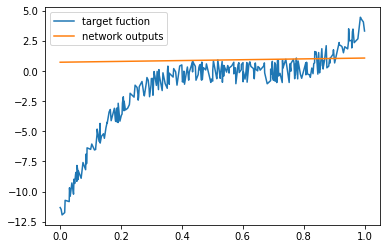

In [5]:
n = MLP(  Nodes=[1,5,1], f='tanh', f_out='ide' )
plt.plot(tx,ty,label='target fuction')
outs = n(tx).reshape(-1)


plt.plot(tx,outs,label='network outputs')
plt.legend()
print(n.error(tx,ty))

0.5971625372883301


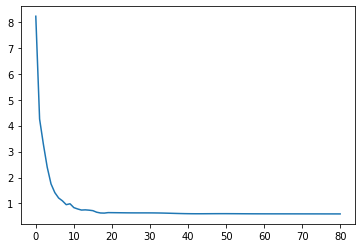

In [6]:
n.train(tx, ty, 1e-02,
  a = 9e-01,
  l = 0,
  max_epochs = 20,
  tresh = .01,
  measure_interval = 20,
  bs=10 )

n.train(tx, ty, 5e-03,
  a = 9e-01,
  l = 0,
  max_epochs = 1000,
  tresh = .01,
  measure_interval = 10,
  bs=None )
clear_output()
plt.plot(n.train_history)
print(n.error(tx,ty))

0.5971625372883301


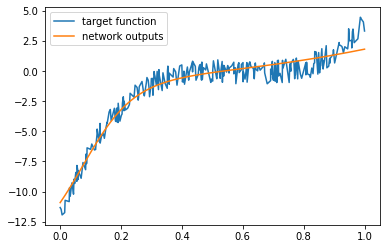

In [7]:
plt.plot(tx,ty,label='target function')
outs = n(tx)
outs = outs.reshape(ty.shape)
plt.plot(tx,outs.reshape(-1),label='network outputs')
plt.legend()

print( n.error(tx,ty))


# Monk test 1

In [4]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-1.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:]

te_data = pd.read_csv('monk_tests/monks-1.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] 

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] 

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(123, 6) (123, 2)
(50, 6) (50, 2)


final error: 1.0


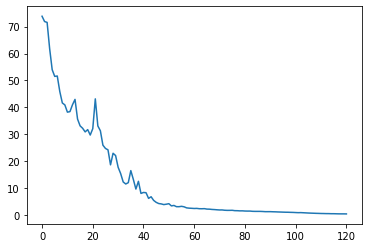

In [5]:
n = MLP(  Nodes=[6,30,10,2], f='relu', f_out='softmax')

n.train(tx, ty, 1e-02,
  a = 9e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 20,
  bs=10 )

plt.plot(n.loss_history)

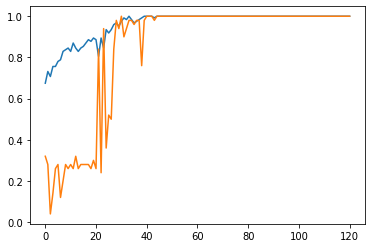

In [6]:
plt.plot(n.train_history)
plt.plot(n.valid_history)

In [7]:
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

(1.0, 1.0, 0.963254593175853)

# Monk test 2

In [30]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-2.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:]

te_data = pd.read_csv('monk_tests/monks-2.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] 

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] 

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(168, 6) (168, 2)
(50, 6) (50, 2)


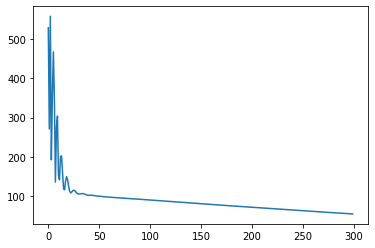

In [35]:
n = MLP(  Nodes=[6,100,50,2], w_range=0.5, f='relu', f_out='softmax')
outs = n(tx)
print( n.error(tx,ty) )

n.train(tx, ty, 1e-02,
  a = 9e-01,
  l = 0,
  val_x = vx,
  val_y = vy,
  max_epochs = 300,
  tresh = 0.001,
  measure_interval = 100,
  bs=None )

plt.plot(n.loss_history)

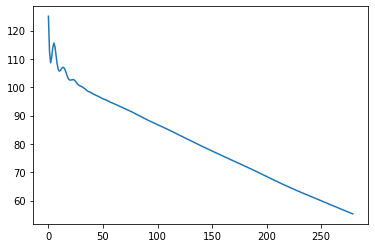

In [36]:
plt.plot(n.loss_history[20:])

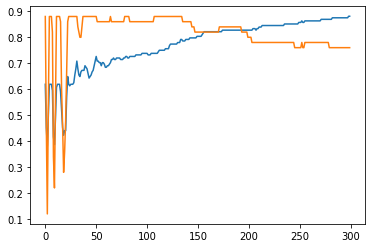

In [37]:
plt.plot(n.train_history)
plt.plot(n.valid_history)

In [38]:
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

(0.8809523809523809, 0.76, 0.7165354330708661)

# Monk test 3

In [39]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-2.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:]

te_data = pd.read_csv('monk_tests/monks-2.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] 

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] 

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(168, 6) (168, 2)
(50, 6) (50, 2)


final error: 1.0


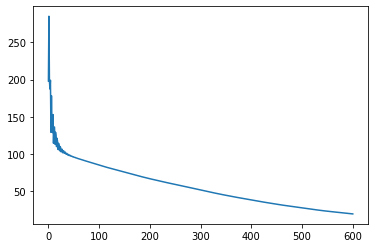

In [40]:
n = MLP(  Nodes=[6,100,50,2], w_range=0.5, f='relu', f_out='softmax')
outs = n(tx)
print( n.error(tx,ty) )

n.train(tx, ty, 1e-02,
  a = 9e-01,
  l = 0,
  val_x = vx,
  val_y = vy,
  max_epochs = 1000,
  tresh = 0.001,
  measure_interval = 100,
  bs=None )

plt.plot(n.loss_history)

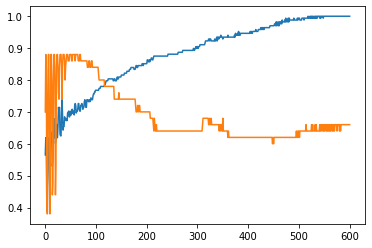

In [41]:
plt.plot(n.train_history)
plt.plot(n.valid_history)

In [42]:
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

(1.0, 0.66, 0.7559055118110236)

# cup

In [12]:
data = pd.read_csv('cup/ML-CUP20-TR.csv',sep=',',index_col=0)
data = data.to_numpy()

tx = data[:,:-2]
ty = data[:,-2:]

tx.shape, ty.shape

((1523, 10), (1523, 2))

In [47]:
n = MLP(  Nodes=[10,50,30,2], f='tanh', f_out='ide', w_range=.7)
print('init', n.error(tx,ty))


init 1718.668180073014


In [48]:
# care: if bs is small it's better to use high measure_interval as the error tends to zig-zag
n.train(tx, ty, 1e-02,
  a = 5e-01,
  l = 1e-5,
  max_epochs = 500,
  tresh = .05,
  measure_interval = 100,
  bs=30 )
clear_output()

plt.plot(n.train_history,label = 'train')
print( n.error(tx,ty))

KeyboardInterrupt: 

In [ ]:
params=[
        {
         'hidden_units': [[50,30]],
         'learning_rate': [ 1e-02, 5e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [1e-12,1e-5],
         "weights_range": [.7],
         "bs":[30],
         "Nu":[10],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y


c,e = k_fold_CV(data, params, k=3, n_init=5, max_epochs=1000, measure_interval=100, tresh=.1,xy=xy)

In [ ]:
print(c)
print(e)

In [ ]:
params=[
        {
         'hidden_units': [[50,30]],
         'learning_rate': [ 1e-02, 5e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [1e-12,1e-5],
         "weights_range": [.7],
         "bs":[100],
         "Nu":[10],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y


c,e = k_fold_CV(data, params, k=3, n_init=5, max_epochs=1000, measure_interval=100, tresh=.1,xy=xy)

In [ ]:
print(c)
print(e)

In [ ]:
params=[
        {
         'hidden_units': [[64,32]],
         'learning_rate': [5e-02, 1e-02, 5e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [1e-12,1e-5],
         "weights_range": [.7],
         "weights_scale": [2], # numero cifre decimali pesi
         "Nu":[10],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y


c,e = k_fold_CV(data, params, k=3, n_init=5, max_epochs=1000, measure_interval=10, tresh=.05,xy=xy)

In [ ]:
print(c)
print(e)